# Book Recommendation System with Python
____

### Popularity Based Recommender System

In [671]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [672]:
books = pd.read_csv("Books.csv", low_memory=False)
users = pd.read_csv("Users.csv", low_memory=False)
ratings = pd.read_csv("Ratings.csv", low_memory=False)

In [673]:
books.head()
books['Image-URL-M'] = books['Image-URL-M'].str.replace('http://', 'https://')

In [674]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [675]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [676]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [677]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [678]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [679]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [680]:
books.duplicated().sum()

0

In [681]:
ratings.duplicated().sum()

0

In [682]:
users.duplicated().sum()

0

EDA

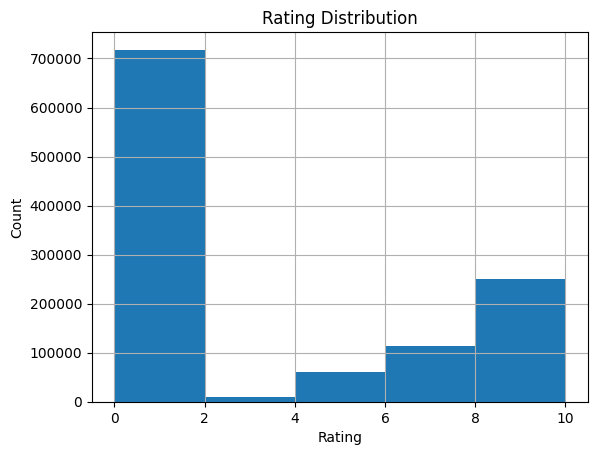

In [683]:
# hist for ratings

ratings['Book-Rating'].hist(bins=5, grid=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [684]:
# Counting ratings per user
user_ratings = ratings['User-ID'].value_counts()

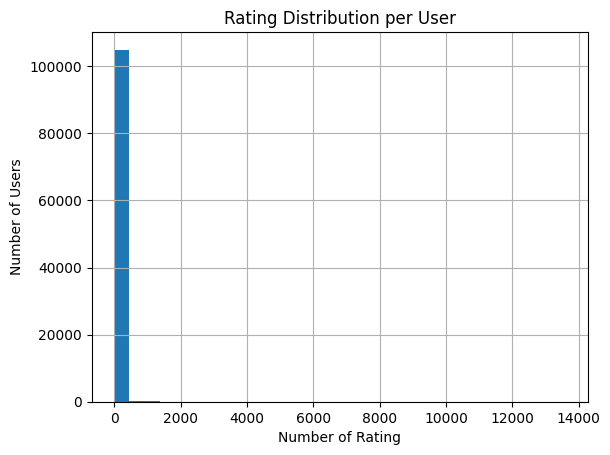

In [685]:
user_ratings.hist(bins=30, grid=True)
plt.title("Rating Distribution per User")
plt.xlabel("Number of Rating")
plt.ylabel("Number of Users")
plt.show()

In [686]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,https://images.amazon.com/images/P/0195153448....,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,https://images.amazon.com/images/P/0002005018....,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,https://images.amazon.com/images/P/0060973129....,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,https://images.amazon.com/images/P/0374157065....,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,https://images.amazon.com/images/P/0393045218....,http://images.amazon.com/images/P/0393045218.0...


In [687]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [688]:
# Top rated books

top_books = ratings.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=False)
top_books.head()

ISBN
0874477050    10.0
561002010     10.0
0590939874    10.0
1570761914    10.0
56500624X     10.0
Name: Book-Rating, dtype: float64

### Popularity Based Recommendation System

In [689]:
ratings_with_name = ratings.merge(books, on='ISBN')

In [690]:
num_rating_dataFrame = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_dataFrame.rename(columns={'Book-Rating':'Num-ratings'},inplace=True) 
num_rating_dataFrame.head()

,Book-Title,Num-ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [691]:
avg_rating_dataFrame = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_dataFrame.rename(columns={'Book-Rating':'Avg-ratings'},inplace=True) 
avg_rating_dataFrame.head()

,Book-Title,Avg-ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [692]:
popularity_df = num_rating_dataFrame.merge(avg_rating_dataFrame, on='Book-Title')
popularity_df

,Book-Title,Num-ratings,Avg-ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [693]:
popularity_df = popularity_df[popularity_df['Num-ratings'] >= 250].sort_values('Avg-ratings', ascending=False).head(50)
popularity_df

,Book-Title,Num-ratings,Avg-ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [694]:
popular_books = popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'Avg-ratings', 'Num-ratings']]
popular_books

,Book-Title,Book-Author,Image-URL-M,Avg-ratings,Num-ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,https://images.amazon.com/images/P/0439136350....,5.852804,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,https://images.amazon.com/images/P/0439139597....,5.824289,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,https://images.amazon.com/images/P/0590353403....,5.737410,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,https://images.amazon.com/images/P/043935806X....,5.501441,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,https://images.amazon.com/images/P/0439064872....,5.183453,556
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339681....,5.007117,281
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339703....,4.948370,368
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,https://images.amazon.com/images/P/059035342X....,4.895652,575
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339711....,4.880769,260
39,To Kill a Mockingbird,Harper Lee,https://images.amazon.com/images/P/0446310786....,4.700000,510


**Collaborative Filtering Based Recommender System**

In [695]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
read_users = x[x].index

In [696]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(read_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,https://images.amazon.com/images/P/002542730X....,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,https://images.amazon.com/images/P/0026217457....,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,https://images.amazon.com/images/P/003008685X....,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,https://images.amazon.com/images/P/0030615321....,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,https://images.amazon.com/images/P/0060002050....,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,https://images.amazon.com/images/P/1931868123....,http://images.amazon.com/images/P/1931868123.0...
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,https://images.amazon.com/images/P/3411086211....,http://images.amazon.com/images/P/3411086211.0...
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,https://images.amazon.com/images/P/3829021860....,http://images.amazon.com/images/P/3829021860.0...
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,https://images.amazon.com/images/P/4770019572....,http://images.amazon.com/images/P/4770019572.0...


In [697]:
# Books which have more than 50 ratings
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [698]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,https://images.amazon.com/images/P/002542730X....,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,https://images.amazon.com/images/P/0060930535....,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,https://images.amazon.com/images/P/0060934417....,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,https://images.amazon.com/images/P/0061009059....,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,https://images.amazon.com/images/P/006440188X....,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,https://images.amazon.com/images/P/1400031354....,http://images.amazon.com/images/P/1400031354.0...
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,https://images.amazon.com/images/P/1400031362....,http://images.amazon.com/images/P/1400031362.0...
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,https://images.amazon.com/images/P/1573229725....,http://images.amazon.com/images/P/1573229725.0...
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,https://images.amazon.com/images/P/1586210661....,http://images.amazon.com/images/P/1586210661.0...


In [699]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [700]:
pt.fillna(0, inplace=True)

In [701]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [702]:
from sklearn.metrics.pairwise import cosine_similarity

In [703]:
similarity_score = cosine_similarity(pt)

In [704]:
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [705]:
def recommend(book_name):
# fetch index with the help of title
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates("Book-Title")['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")['Image-URL-M'].values))

        data.append(item)

    return data

In [706]:
recommend('Touching Evil')

[['Forever... : A Novel of Good and Evil, Love and Hope',
  'Jude Deveraux',
  'https://images.amazon.com/images/P/067101420X.01.MZZZZZZZ.jpg'],
 ['Killjoy',
  'Julie Garwood',
  'https://images.amazon.com/images/P/0345453816.01.MZZZZZZZ.jpg'],
 ['The Jester',
  'James Patterson',
  'https://images.amazon.com/images/P/0316602051.01.MZZZZZZZ.jpg'],
 ['Envy',
  'Sandra Brown',
  'https://images.amazon.com/images/P/0446611808.01.MZZZZZZZ.jpg'],
 ['Mercy',
  'Julie Garwood',
  'https://images.amazon.com/images/P/0671034022.01.MZZZZZZZ.jpg']]

In [707]:
import pickle
pickle.dump(popular_books, open('popular.pkl', 'wb'))

In [708]:
pickle.dump(pt, open('pt.pkl','wb'))
pickle.dump(books, open('books.pkl','wb'))
pickle.dump(similarity_score, open('similarity_score.pkl','wb'))